In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv('approved_projects_with_demographics.csv')
#df = df[['permitnumber', 'worktype', 'permittypedescr', 'declared_valuation', 'occupancytype', 'city']]
df.head()

,Unnamed: 0,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,...,Male,Male Proportion,Female,Female Proportion,Lat,Long,Primary Sub-Neighborhood,Secondary Sub-Neighborhood,Teritriary Sub-Neighborhood(s),T-Stop/Commuter Rail
0,0,A1048,ERECT,Amendment to a Long Form,Erect,Revise rear apartment layout. Add roof deck to...,Hugh Meehan,0.0,39.0,3/30/10 11:51,...,"2,274",50.34%,"2,243",49.66%,42.334606,-71.09621,Frederick Douglas Square Historic District,Lower Roxbury,Fenway-Kenmore,Longwood Medical Area/Ruggles
1,1,A21302,NEWCON,Amendment to a Long Form,New construction,Add 2 individual roof decks to 2 top floor uni...,Philip Hresko,15000.0,246.0,5/13/10 13:59,...,"2,274",50.34%,"2,243",49.66%,42.334606,-71.09621,Frederick Douglas Square Historic District,Lower Roxbury,Fenway-Kenmore,Longwood Medical Area/Ruggles
2,2,COO752522,ERECT,Certificate of Occupancy,Erect,(18) Residential units and;retail space on fir...,Ken McLaughlin,0.0,560.0,3/27/18 0:00,...,"2,274",50.34%,"2,243",49.66%,42.334606,-71.09621,Frederick Douglas Square Historic District,Lower Roxbury,Fenway-Kenmore,Longwood Medical Area/Ruggles
3,3,COO752522,ERECT,Certificate of Occupancy,Erect,(18) Residential units and;retail space on fir...,Ken McLaughlin,0.0,560.0,3/27/18 0:00,...,"2,274",50.34%,"2,243",49.66%,42.334606,-71.09621,Frederick Douglas Square Historic District,Lower Roxbury,Fenway-Kenmore,Longwood Medical Area/Ruggles
4,4,COO752522,ERECT,Certificate of Occupancy,Erect,(18) Residential units and;retail space on fir...,Ken McLaughlin,0.0,560.0,3/27/18 0:00,...,"2,274",50.34%,"2,243",49.66%,42.334606,-71.09621,Frederick Douglas Square Historic District,Lower Roxbury,Fenway-Kenmore,Longwood Medical Area/Ruggles


In [23]:
worktypes_df = pd.DataFrame(columns = ['worktype', 'count'])

worktypes = df['worktype'].unique()

work_groups = df.groupby(df.worktype)

for i in range(len(worktypes)):
    temp_df = work_groups.get_group(worktypes[i])
    worktypes_df.loc[i] = [worktypes[i], len(temp_df)]

worktypes_df.loc[9] = ['UNLABELED', 19]
worktypes_df

,worktype,count
0,ERECT,815
1,NEWCON,219
2,INTEXT,1
3,EXTREN,2
4,GARAGE,3
5,,4
6,CONVRT,28
7,COB,12
8,CHGOCC,1
9,UNLABELED,19


Text(0, 0.5, 'Count')

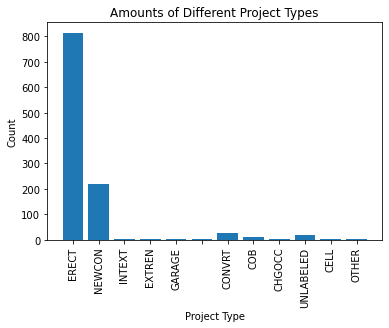

In [24]:
plt.bar(worktypes_df['worktype'], worktypes_df['count'])
plt.xticks(rotation=90)
plt.title('Amounts of Different Project Types')
plt.xlabel('Project Type')
plt.ylabel('Count')

In [25]:
permit_type_df = pd.DataFrame(columns = ['permittype', 'count'])

permittypes = df['permittypedescr'].unique()

types_groups = df.groupby(df.permittypedescr)

for i in range(len(permittypes)):
    temp_df = types_groups.get_group(permittypes[i])
    permit_type_df.loc[i] = [permittypes[i], len(temp_df)]

permit_type_df

,permittype,count
0,Erect/New Construction,970
1,Long Form/Alteration Permit,72
2,Amendment to a Long Form,48


Text(0, 0.5, 'Count')

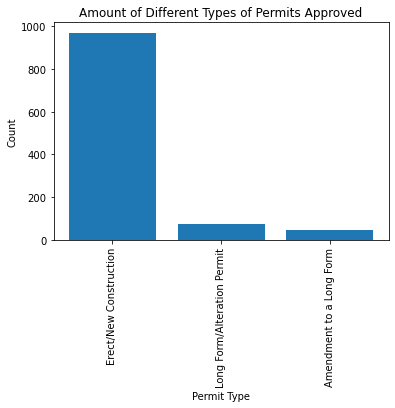

In [26]:
plt.bar(permit_type_df['permittype'], permit_type_df['count'])
plt.xticks(rotation=90)
plt.title('Amount of Different Types of Permits Approved')
plt.xlabel('Permit Type')
plt.ylabel('Count')

In [7]:
new = pd.concat([df[df['permittypedescr'] == 'Erect/New Construction'], df[df['permittypedescr'] == 'Long Form/Alteration Permit'],
                df[df['permittypedescr'] == 'Amendment to a Long Form']])
new.to_csv('UPDATED_approved_projects_with_demographics.csv')

In [28]:
occupancy_type_df = pd.DataFrame(columns = ['occupancytype', 'count'])

occupancytypes = df['occupancytype'].unique()

types_groups = df.groupby(df.occupancytype)

for i in range(len(occupancytypes)):
    temp_df = types_groups.get_group(occupancytypes[i])
    occupancy_type_df.loc[i] = [occupancytypes[i], len(temp_df)]

occupancy_type_df.loc[1] = ['Unlabeled', 6970]
occupancy_type_df

,occupancytype,count
0,Mixed,92
1,Unlabeled,6970
2,Multi,194
3,Comm,104
4,VacLd,110
5,1-3FAM,126
6,2unit,4
7,Other,36
8,7More,1
9,1-4FAM,35


Text(0, 0.5, 'Count')

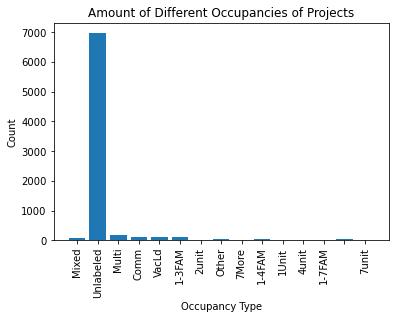

In [29]:
plt.bar(occupancy_type_df['occupancytype'], occupancy_type_df['count'])
plt.xticks(rotation=90)
plt.title('Amount of Different Occupancies of Projects')
plt.xlabel('Occupancy Type')
plt.ylabel('Count')

In [30]:
valuation_df = pd.DataFrame(columns = ['declared_valuation', 'count'])

m = df['declared_valuation'].gt(30000)
df['above 30,000'] = (m.groupby(df['permitnumber']).transform('sum').eq(1) & m).astype(int)

valuation_df.loc[0] = ['Above $30,000', sum(df['above 30,000'])]
valuation_df.loc[1] = ['Less than or equal to $30,000', len(df) - sum(df['above 30,000'])]

valuation_df

,declared_valuation,count
0,"Above $30,000",809
1,"Less than or equal to $30,000",281


Text(0, 0.5, 'Count')

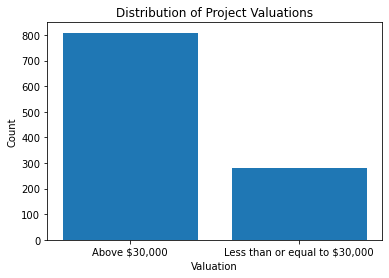

In [31]:
plt.bar(valuation_df['declared_valuation'], valuation_df['count'])
#plt.xticks(rotation=90)
plt.title('Distribution of Project Valuations')
plt.xlabel('Valuation')
plt.ylabel('Count')

In [32]:
valuation_df2 = pd.DataFrame(columns = ['declared_valuation', 'count'])

m = df['declared_valuation'].gt(0)
df['above 0'] = (m.groupby(df['permitnumber']).transform('sum').eq(1) & m).astype(int)

valuation_df2.loc[0] = ['Above $0', sum(df['above 0'])]
valuation_df2.loc[1] = ['Equal to $0', len(df) - sum(df['above 0'])]

valuation_df2

,declared_valuation,count
0,Above $0,866
1,Equal to $0,224


Text(0, 0.5, 'Count')

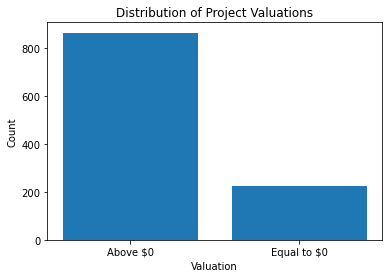

In [33]:
plt.bar(valuation_df2['declared_valuation'], valuation_df2['count'])
#plt.xticks(rotation=90)
plt.title('Distribution of Project Valuations')
plt.xlabel('Valuation')
plt.ylabel('Count')

In [34]:
filt = df['above 0'] == 1
df2 = df[filt]

valuation_df = pd.DataFrame(columns = ['declared_valuation', 'count'])

m = df2['declared_valuation'].gt(30000)
df2['above 30,000'] = (m.groupby(df2['permitnumber']).transform('sum').eq(1) & m).astype(int)

valuation_df.loc[0] = ['Above $30,000', sum(df2['above 30,000'])]
valuation_df.loc[1] = ['Less than or equal to $30,000', len(df2) - sum(df2['above 30,000'])]

valuation_df

<ipython-input-34-56eeea366270>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['above 30,000'] = (m.groupby(df2['permitnumber']).transform('sum').eq(1) & m).astype(int)


,declared_valuation,count
0,"Above $30,000",809
1,"Less than or equal to $30,000",57


Text(0, 0.5, 'Count')

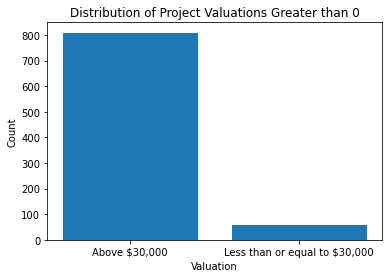

In [35]:
plt.bar(valuation_df['declared_valuation'], valuation_df['count'])
#plt.xticks(rotation=90)
plt.title('Distribution of Project Valuations Greater than 0')
plt.xlabel('Valuation')
plt.ylabel('Count')

In [38]:
city_df = pd.DataFrame(columns = ['city', 'count'])

cities = list(df['city'].unique())

city_groups = df.groupby(df.city)

for i in range(len(cities)):
    if type(cities[i]) == float:
        pass
    else:
        temp_df = city_groups.get_group(cities[i])
        city_df.loc[i] = [cities[i], len(temp_df)]

display(city_df)

,city,count
0,Mission Hill,18
1,West Roxbury,54
2,South Boston,212
3,Roslindale,40
4,East Boston,121
5,Jamaica Plain,54
6,Boston,72
7,Dorchester,272
8,Roxbury,86
9,Chestnut Hill,1


Text(0, 0.5, 'Count')

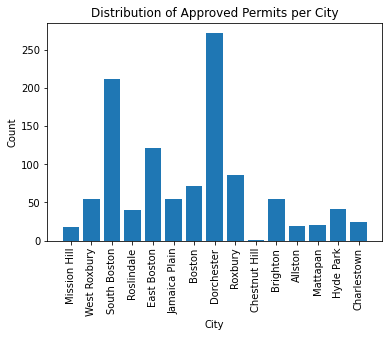

In [39]:
plt.bar(city_df['city'], city_df['count'])
plt.xticks(rotation=90)
plt.title('Distribution of Approved Permits per City')
plt.xlabel('City')
plt.ylabel('Count')

In [43]:
filt = df['permittypedescr'] == 'Excavation Permit'
df2 = df[filt]
df2['declared_valuation'].unique()

array([0.])

In [56]:
# REMOVED ALL MAIN WORKTYPE (MAIN = MAINTENANCE)
filt = df['worktype'] == 'Main'
drop = df[filt]
inds = drop.index
df = df.drop(inds)
df

,permitnumber,worktype,permittypedescr,declared_valuation,occupancytype,city
0,A1048,ERECT,Amendment to a Long Form,0.0,Mixed,Mission Hill
1,A21302,NEWCON,Amendment to a Long Form,15000.0,Mixed,Mission Hill
2,COO752522,ERECT,Certificate of Occupancy,0.0,Mixed,Mission Hill
3,COO752522,ERECT,Certificate of Occupancy,0.0,Mixed,Mission Hill
4,COO752522,ERECT,Certificate of Occupancy,0.0,Mixed,Mission Hill
...,...,...,...,...,...,...
9161,EXCA-846479,Service,Excavation Permit,0.0,,South Boston
9162,EXCA-961507,Capital,Excavation Permit,0.0,,South Boston
9163,SF522908,ERECT,Short Form Bldg Permit,915.0,VacLd,South Boston
9165,SF95509,ERECT,Short Form Bldg Permit,1350.0,VacLd,Jamaica Plain


In [18]:
df = pd.read_csv('UPDATED_approved_projects_with_demographics.csv')

In [19]:
valuation_df = pd.DataFrame(columns = ['declared_valuation', 'count'])

m = df['declared_valuation'].gt(30000)
df['above 30,000'] = (m.groupby(df['permitnumber']).transform('sum').eq(1) & m).astype(int)

valuation_df.loc[0] = ['Above $30,000', sum(df['above 30,000'])]
valuation_df.loc[1] = ['Less than or equal to $30,000', len(df) - sum(df['above 30,000'])]

valuation_df

,declared_valuation,count
0,"Above $30,000",809
1,"Less than or equal to $30,000",281


In [20]:
valuation_df2 = pd.DataFrame(columns = ['declared_valuation', 'count'])

m = df['declared_valuation'].gt(0)
df['above 0'] = (m.groupby(df['permitnumber']).transform('sum').eq(1) & m).astype(int)

valuation_df2.loc[0] = ['Above $0', sum(df['above 0'])]
valuation_df2.loc[1] = ['Equal to $0', len(df) - sum(df['above 0'])]

valuation_df2

,declared_valuation,count
0,Above $0,866
1,Equal to $0,224
